# Классификация текстов с использованием Наивного Байесовского Классификатора

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [196]:
email_data = pd.read_csv('data/spam_or_not_spam.csv')
email_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [197]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [198]:
email_data.groupby('label').count()

,email
label,
0,2500
1,499


<AxesSubplot:title={'center':'Соотношение классов'}, ylabel='Frequency'>

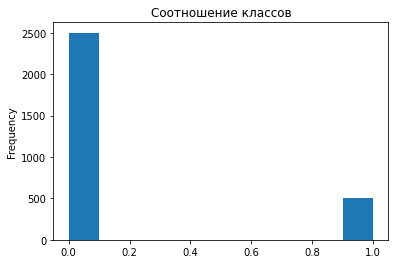

In [199]:
email_data['label'].plot(kind='hist', title='Соотношение классов')

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

Замените все пустоты (пустые строки) в данных на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [201]:
email_data.isnull().sum()

email    1
label    0
dtype: int64

In [202]:
email_data = email_data.fillna({'email': np.NaN})

In [203]:
email_data = email_data.dropna(how='any', axis=0)

In [204]:
email_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   2999 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 70.3+ KB


Переводим данные в векторный вид:

In [205]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(email_data["email"])

Определите, сколько теперь признаков в нашем наборе данных:

In [206]:
X.shape[1]

34116

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [207]:
y = email_data['label']
y.shape

(2999,)

Разделите выборку на обучающую и тестовую, размер тестовой выборки возьмите как 0.25, параметр random_state определите со значением 42:

In [208]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state=42)

In [209]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2249, 34116) (750, 34116)
(2249,) (750,)


Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [210]:
y_test.mean()

0.164

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [211]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB(alpha=0.01)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [212]:
from sklearn import metrics

def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
    print('Train accuracy: {:.3f}'.format(metrics.accuracy_score(y_train, y_train_predict)))
    print('Train precission: {:.3f}'.format(metrics.precision_score(y_train, y_train_predict)))
    print('Train recall: {:.3f}'.format(metrics.recall_score(y_train, y_train_predict)))
    print('Train F1-score: {:.3f}'.format(metrics.f1_score(y_train, y_train_predict)))
    print('\n')
    print('Test accuracy: {:.3f}'.format(metrics.accuracy_score(y_test, y_test_predict)))
    print('Test precission: {:.3f}'.format(metrics.precision_score(y_test, y_test_predict)))
    print('Test recall: {:.3f}'.format(metrics.recall_score(y_test, y_test_predict)))
    print('Train F1-score: {:.3f}'.format(metrics.f1_score(y_test, y_test_predict)))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train accuracy: 0.998
Train precission: 1.000
Train recall: 0.987
Train F1-score: 0.993


Test accuracy: 0.995
Test precission: 0.984
Test recall: 0.984
Train F1-score: 0.984


In [213]:
print(metrics.classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       627
           1       0.98      0.98      0.98       123

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



Нарисуйте ROC-кривую:

ROC AUC=0.987


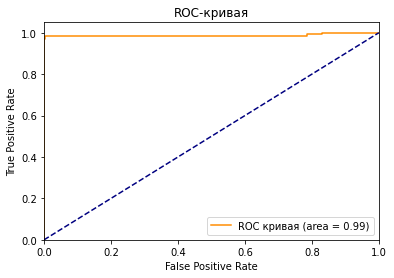

In [214]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

y_test_probs = clf.predict_proba(X_test)
y_probs = y_test_probs[:, 1]
# рассчитываем ROC AUC
test_auc = roc_auc_score(y_test, y_probs)
print('ROC AUC=%.3f' % (test_auc))
# рассчитываем roc-кривую
fpr, tpr, treshold = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
# строим график
plt.plot(fpr, tpr, color='darkorange', label='ROC кривая (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [215]:
#Создаём список из 20 возможных значений от 0.001 до 0.1
alpha_list = np.linspace(0.001, 0.1, 20)
#Создаём пустые списки, в которые будем добавлять результаты 
train_scores = []
test_scores = []
for alpha in alpha_list:
    #Создаём объект класса ComplementNB
    clf = ComplementNB(alpha=alpha)
    #Обучаем модель
    clf.fit(X_train, y_train)
    #Делаем предсказание для тренировочной выборки
    y_train_predict = clf.predict(X_train)
    #Делаем предсказание для тестовой выборки
    y_test_predict = clf.predict(X_test)
    #Рассчитываем accuracy для двух выборок и добавляем их в списки
    train_scores.append(metrics.accuracy_score(y_train, y_train_predict))
    test_scores.append(metrics.accuracy_score(y_test, y_test_predict))

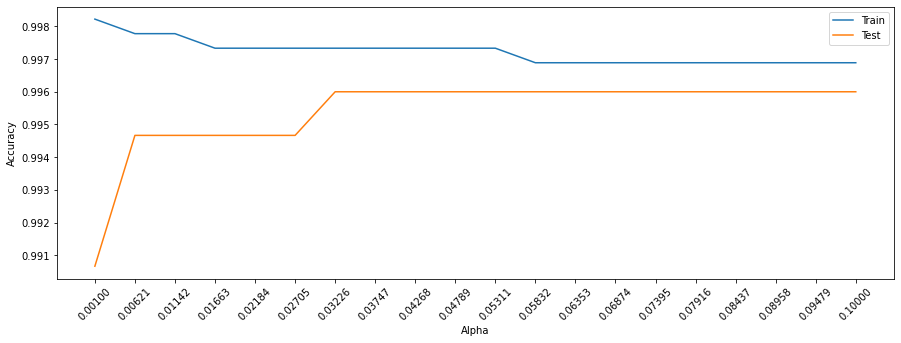

In [216]:
#Визуализируем изменение accuracy в зависимости от alpha
fig, ax = plt.subplots(figsize=(15, 5)) #фигура + координатная плоскость
ax.plot(alpha_list, train_scores, label='Train') #линейный график для тренировочной выборки
ax.plot(alpha_list, test_scores, label='Test') #линейный график для тестовой выборки
ax.set_xlabel('Alpha') #название оси абсцисс
ax.set_ylabel('Accuracy') #название оси ординат
ax.set_xticks(alpha_list) #метки по оси абсцисс
ax.xaxis.set_tick_params(rotation=45) #поворот меток на оси абсцисс
ax.legend(); #отображение легенды

# Реализация алгоритма "вручную"

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
email_data = pd.read_csv('data/spam_or_not_spam.csv')
email_data = email_data.fillna({'email': np.NaN})
email_data = email_data.dropna(how='any', axis=0)

Предобработка данных

- replace('\W+', ' ') - замена на пробелы все небуквенные символы
- replace('\s+', ' ') - замена пробельных символов табуляции и переноса строки на пробелы
- strip() - очистить все лишние пробелы по краям сообщений

In [ ]:
email_data['email'] = email_data['email'].str.replace('\W+', ' ').str.replace('\s+', ' ').str.strip()

In [ ]:
# перевод в нижний регистр
email_data['email'] = email_data['email'].str.lower()

# перевод строк в списки слов
email_data['email'] = email_data['email'].str.split()

In [ ]:
email_data['email'].head()

Заменим значения на object

In [ ]:
email_data['label'] = email_data['label'].apply(lambda x: 'spam' if x==1 else 'not_spam')

Процент спам-сообщений и нормальных сообщений

In [ ]:
email_data['label'].value_counts() / email_data.shape[0] * 100

Разделение на обучающую и тестовую выборки

In [ ]:
train_data = email_data.sample(frac=0.8,random_state=42).reset_index(drop=True)
test_data = email_data.drop(train_data.index).reset_index(drop=True)
train_data = train_data.reset_index(drop=True)

In [ ]:
train_data['label'].value_counts() / train_data.shape[0] * 100

In [ ]:
train_data.shape

In [ ]:
test_data['label'].value_counts() / test_data.shape[0] * 100

In [ ]:
test_data.shape

In [ ]:
test_data.head()

Список слов

In [ ]:
vocabulary = list(set(train_data['email'].sum()))
vocabulary[500:515]

In [ ]:
len(vocabulary)

Рассчитаем частоты слов

In [ ]:
word_counts_per_email = pd.DataFrame([
    [row[0].count(word) for word in vocabulary]
    for _, row in train_data.iterrows()], columns=vocabulary)

In [ ]:
word_counts_per_email.rename(columns={'label': 'label_'}, inplace=True)

In [ ]:
train_data = pd.concat([train_data.reset_index(), word_counts_per_email], axis=1).iloc[:,1:]
train_data.head()

Значения для формулы Байеса

In [ ]:
alpha = 1

# Количество признаков
Nvoc = len(train_data.columns) - 3

# Вероятность спама: количество всех писем со спамом / количество всех сообщений
Pspam = train_data['label'].value_counts()['spam'] / train_data.shape[0]

# Вероятность не спама: количество всех писем не спама / количество всех сообщений
Pham = train_data['label'].value_counts()['not_spam'] / train_data.shape[0]

# Количество уникальных слов в спаме
Nspam = train_data.loc[train_data['label'] == 'spam', 'email'].apply(len).sum()

# Количество уникальных слов в не спаме
Nham = train_data.loc[train_data['label'] == 'not_spam', 'email'].apply(len).sum()

# Вероятность того, что слово встречается если это спам
def p_w_spam(word):
    if word in train_data.columns:
        return (train_data.loc[train_data['label'] == 'spam', word].sum() + alpha) / (Nspam + alpha*Nvoc)
    else:
        return 1
    
# Вероятность того, что слово встречается если это не спам
def p_w_not_spam(word):
    if word in train_data.columns:
        return (train_data.loc[train_data['label'] == 'not_spam', word].sum() + alpha) / (Nham + alpha*Nvoc)
    else:
        return 1

Алгоритм классификации

In [ ]:
def classify(message):
    p_spam_given_message = Pspam
    p_not_spam_given_message = Pham
    for word in message:
        p_spam_given_message *= p_w_spam(word)
        p_not_spam_given_message *= p_w_not_spam(word)
    if p_not_spam_given_message > p_spam_given_message:
        return 'not_spam'
    elif p_not_spam_given_message < p_spam_given_message:
        return 'spam'
    else:
        return 'классификация некорректна'

Используем тестовые данные

In [ ]:
test_data.info()

In [ ]:
test_data['predicted'] = test_data['email'].apply(classify)
test_data.head()

In [ ]:
correct = (test_data['predicted'] == test_data['label']).sum() / test_data.shape[0] * 100
correct

In [ ]:
test_data.loc[test_data['predicted'] != test_data['label']]